# FOOD SAFETY

## Cleaning and Exploring Data

---
# Introduction

<img src="scoreCard.jpg" width=400>

In this project, we will investigate restaurant food safety scores for restaurants in San Francisco. Above is a sample score card for a restaurant. The scores and violation information have been made available by the San Francisco Department of Public Health. The main goal for this project is to understand how restaurants are scored. We will walk through various steps of exploratory data analysis to do this. We will provide comments and insights along the way to give you a sense of how we arrive at each discovery and what next steps it leads to.

As we clean and explore these data, we will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Applying probability sampling techniques
* Exploring characteristics and distributions of individual variables

---
# Import the environnements 

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

---
# Part I - Loading Food Safety Data

We have data, but we don't have any specific questions about the data yet, so let's focus on understanding the structure of the data. This involves answering questions such as:

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

Let's start by looking at the contents of `data`.

In [2]:
from pathlib import Path
data_dir = Path('data')
list_names = !ls {data_dir}
list_names

['businesses.csv', 'inspections.csv', 'legend.csv', 'violations.csv']

Based on the above information, let's attempt to load `businesses.csv`, `inspections.csv`, `legend.csv`, and `violations.csv` into pandas data frames with the following names: `bus`, `ins`, `leg`, and `vio` respectively.

*Note:* Because of character encoding issues one of the files (`bus`) will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`.

In [3]:
bus = pd.read_csv('data/businesses.csv', encoding='ISO-8859-1') 
ins = pd.read_csv('data/inspections.csv')
leg = pd.read_csv('data/legend.csv')
vio = pd.read_csv('data/violations.csv')

In [4]:
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440


In [5]:
ins.head()

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


In [6]:
leg.head()

,Minimum_Score,Maximum_Score,Description
0,0,70,Poor
1,71,85,Needs Improvement
2,86,90,Adequate
3,91,100,Good


In [7]:
vio.head()

,business_id,date,description
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
3,19,20160513,Unclean or degraded floors walls or ceilings ...
4,19,20160513,Food safety certificate or food handler card n...


We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables individually. Let's begin with the businesses file, which has been read into the `bus` dataframe.

---
# Part II - Examining the Business Data

From its name alone, we expect the `businesses.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

In [8]:
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440


### II. 1) Business ID

First, let's examine the entries in `bus`, is the `business_id` unique for each record?

In [9]:
bus['business_id'].value_counts().max() == 1

True

### II. 2) Granularity

With this information, we can address the question of granularity. Let's answer the questions below.

1. What does each record represent (e.g., a business, a restaurant, a location, etc.)?  
1. What is the primary key?
1. What would we find by grouping by the following columns: `business_id`, `name`, `address`?

In [10]:
len(bus['name'].unique()) == len(bus)

False

In [11]:
print("Number of records:", len(bus))
print("Most frequently occuring business names:", 
      list(bus['name'].value_counts().sort_values(ascending=False).index[:3]))
print("A few samples of the business with most frequent name:")
bus[bus['name'] == bus['name'].value_counts().idxmax()].head(7)

Number of records: 6406
Most frequently occuring business names: ['STARBUCKS COFFEE', "PEET'S COFFEE & TEA", 'MCDONALDS']
A few samples of the business with most frequent name:


,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
9,66,STARBUCKS COFFEE,1800 IRVING ST,San Francisco,CA,94122,37.763578,-122.477461,+14152427970
236,1085,STARBUCKS COFFEE,333 MARKET ST,San Francisco,CA,94105,37.792037,-122.397852,+14152410256
238,1103,STARBUCKS COFFEE,4094 18TH ST,San Francisco,CA,94114,37.760938,-122.434692,+14152410256
240,1116,STARBUCKS COFFEE,1899 UNION ST,San Francisco,CA,94123,37.797713,-122.430336,+14159214049
241,1122,STARBUCKS COFFEE,2132 CHESTNUT ST,San Francisco,CA,94123,37.800547,-122.438494,+14156736781
244,1127,STARBUCKS COFFEE,555 CALIFORNIA ST,San Francisco,CA,94104,37.792773,-122.403567,+14159551940
272,1265,STARBUCKS COFFEE,744 IRVING ST,San Francisco,CA,94122,37.764088,-122.465981,+14158540888


Each row has a unique `business_id` that serves as a primary key. If we then groupby `name` we see that there are many rows/records with the same name at different locations indicating that each record represents an individual restaurant, not a business. Grouping by `business_id` finds nothing new. Grouping by `name` finds all locations of the same restaurant (plus perhaps some spurious matches). Grouping by `address` finds all stores that share a location.

---
# Part III - Zip Codes

Next, let's  explore some of the variables in the business table. We begin by examining the postal code.

###  III. 1) Generalities

The ZIP codes are largely nominal fields with little meaning to differences or ratios.  
While in some regions of the country similar numbers correspond to similar locations, this relationship is not reliable.

The ZIP codes are currently stored as strings.

### III. 2) Number of restaurants in each ZIP code

How many restaurants are in each ZIP code? 

In the cell below, we create a series where the index is the postal code and the value is the number of records with that postal code in descending order of count. 

In [12]:
zip_counts = bus.loc[: , ['postal_code', 'name']].groupby('postal_code').count().sort_values(
    by = 'name', ascending = False)
zip_counts.head()

,name
postal_code,
94110,596
94103,552
94102,462
94107,460
94133,426


However, we did not take into account that some businesses have missing ZIP codes:

In [16]:
print('Number of records described by zip_counts: ', zip_counts['name'].sum())
print('Nuber of records of the original data: ', len(bus))

Number of records described by zip_counts:  6166
Nuber of records of the original data:  6406


Missing data is extremely common in real-world data science projects. There are several ways to include missing postal codes in the `zip_counts` series above. One approach is to use the `fillna` method of the series, which will replace all NaN values with a string of our choosing. In the example below, we picked "?????".

In [17]:
zip_counts = bus.fillna("?????").loc[: , ['postal_code', 'name']].groupby('postal_code').count().sort_values(
    by = 'name', ascending = False)

zip_counts.head(15)

,name
postal_code,
94110,596
94103,552
94102,462
94107,460
94133,426
94109,380
94111,277
94122,273
94118,249


An alternate approach is to use the DataFrame `value_counts` method with the optional argument `dropna = False`, which will ensure that null values are counted. In this case, the index will be `NaN` for the row corresponding to a null postal code.

In [18]:
bus["postal_code"].value_counts(dropna = False).sort_values(ascending = False).head(15)

94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
NaN      240
94105    232
94108    228
94114    223
94117    204
Name: postal_code, dtype: int64

Missing zip codes aren't our only problem. There are also some records where the postal code is wrong, e.g., there are 3 'Ca' and 3 'CA' values. Additionally, there are some extended postal codes that are 9 digits long, rather than the typical 5 digits.

Let's clean up the extended zip codes by dropping the digits beyond the first 5. Rather than deleting or replacing the old values in the `postal_code` columnm, we'll instead create a new column called `postal_code_5`.

The reason we're making a new column is that it's typically good practice to keep the original values when we are manipulating data. This makes it easier to recover from mistakes, and also makes it more clear that we are not working with the original raw data.

In [19]:
bus['postal_code_5'] = bus['postal_code'].str[:5]
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


### III. 3) A Closer Look at Missing ZIP Codes

Let's look more closely at records with missing ZIP codes. We will describe why some records have missing postal codes.  We pay attention to their addresses. We will need to look at many entries, not just the first five.

In [20]:
bus.loc[bus['postal_code'].isnull(), 'address'].value_counts().head(3)

 OFF THE GRID                    69
 APPROVED PRIVATE LOCATIONS       6
 APPROVED LOCATIONS               4
Name: address, dtype: int64

Many of the restuarants without ZIP codes are food trucks (e.g., OFF THE GRID) or catering services.
Therefore, a missing ZIP code might actually make sense and dropping these from the analysis could bias our conclusions.

### III. 4) Incorrect ZIP Codes

This dataset is supposed to be only about San Francisco, so let's set up a list of all San Francisco ZIP codes.

In [21]:
all_sf_zip_codes = ["94102", "94103", "94104", "94105", "94107", "94108", 
                    "94109", "94110", "94111", "94112", "94114", "94115", 
                    "94116", "94117", "94118", "94119", "94120", "94121", 
                    "94122", "94123", "94124", "94125", "94126", "94127", 
                    "94128", "94129", "94130", "94131", "94132", "94133", 
                    "94134", "94137", "94139", "94140", "94141", "94142", 
                    "94143", "94144", "94145", "94146", "94147", "94151", 
                    "94158", "94159", "94160", "94161", "94163", "94164", 
                    "94172", "94177", "94188"]

We set `weird_zip_code_businesses` equal to a new dataframe showing only rows corresponding to ZIP codes that are not valid and not missing. We use the `postal_code_5` column.

In [22]:
weird_zip_code_businesses = bus[~bus['postal_code_5'].isin(all_sf_zip_codes) & -bus['postal_code_5'].isnull()]
weird_zip_code_businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.807878,-122.442499,+14153462628,941
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545
1373,5757,"RICO VENDING, INC",VARIOUS LOCATIONS,San Francisco,CA,94066,NaN,NaN,+14155836723,94066
2258,36547,EPIC ROASTHOUSE,PIER 26 EMBARARCADERO,San Francisco,CA,95105,37.788962,-122.387941,+14153699955,95105
2293,37167,INTERCONTINENTAL SAN FRANCISCO EMPLOYEE CAFETERIA,888 HOWARD ST 2ND FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013


If we were doing very serious data analysis, we might indivdually look up every one of these strange records. Let's focus on just two of them: ZIP codes 94545 and 94602. We use a search engine to identify what cities these ZIP codes appear in:
- 94545 - Hayward, look at record and see it's vending machine company with many locations  
- 94602 - Oakland, look at the record and see it's probably a typo and should be 94102

### III. 5) Value 94602

We often want to clean the data to improve our analysis. This cleaning might include changing values for a variable or dropping records.

The value 94602 is wrong. We change it to the most reasonable correct value, using all information we have available. 

In [23]:
bus['postal_code_5'] = bus['postal_code_5'].str.replace("94602", "94102")

### III. 6) Final manipulation with postal codes

Now that we have corrected one of the weird postal codes, let's filter our `bus` data such that only postal codes from San Francisco remain. While we're at it, we'll also remove the businesses that are missing a postal code. As we mentioned previously, filtering our postal codes in this way may not be ideal. 

We assign `bus` to a new dataframe that has the same columns but only the rows with ZIP codes in San Francisco:

In [24]:
bus = bus[bus['postal_code_5'].isin(all_sf_zip_codes) & bus['postal_code_5'].notnull()]
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


---
# Part IV - Latitude and Longitude

Let's also consider latitude and longitude values and get a sense of how many are missing.

### IV. 1) Missing longitude values

How many businesses are missing longitude values?

In [25]:
num_missing_longs = sum(bus['longitude'].isnull())
num_missing_longs

2942

As a somewhat contrived exercise in data manipulation, let's try to identify which ZIP codes are missing the most longitude values. Let's focus on only the "dense" ZIP codes of the city of San Francisco, listed below as `sf_dense_zip`.

In [26]:
sf_dense_zip = ["94102", "94103", "94104", "94105", "94107", "94108",
                "94109", "94110", "94111", "94112", "94114", "94115",
                "94116", "94117", "94118", "94121", "94122", "94123", 
                "94124", "94127", "94131", "94132", "94133", "94134"]

In the cell below, we create a series where the index is `postal_code_5`, and the value is the number of businesses with missing longitudes in that ZIP code. The series will be in descending order. Only businesses from `sf_dense_zip` will be included.

In [27]:
def count_null(s):
    return len(s[s.isnull()])

bus_sf = bus[bus['postal_code_5'].isin(sf_dense_zip)]
num_missing_in_each_zip = bus_sf['longitude'].groupby(bus_sf["postal_code_5"]).agg(
    count_null).sort_values(ascending = False)

num_missing_in_each_zip.head()

postal_code_5
94110    294.0
94103    285.0
94107    275.0
94102    222.0
94109    171.0
Name: longitude, dtype: float64

### IV. 2) Proportion of null values

Previously, we counted the number of null values per ZIP code. Let's now count the proportion of null values.

We create a new dataframe of counts of the null and proportion of null values, storing the result in `fraction_missing_df`. It will have an index called `postal_code_5` and will also have 3 columns:

1. `count null`: The number of missing values for the zip code.
2. `count non null`: The number of present values for the zip code.
3. `fraction null`: The fraction of values that are null for the zip code.

The data frame will be sorted by the fraction null in descending order.

In [28]:
def count_null(s):
    return len(s[s.isnull()])

def count_non_null(s):
    return len(s[~s.isnull()])

def fraction_null(s):
    n = len(s[s.isnull()])
    nn = len(s[~s.isnull()])
    return (n/(n+nn))

bus_sf = bus[bus['postal_code_5'].isin(sf_dense_zip)]

fraction_missing_df = bus_sf['longitude'].groupby(bus['postal_code_5']).agg(
    [count_non_null, count_null, fraction_null])

fraction_missing_df.columns = ['count non null', 'count null', 'fraction null']

fraction_missing_df = fraction_missing_df.sort_values("fraction null", ascending=False)

fraction_missing_df.head()

,count non null,count null,fraction null
postal_code_5,,,
94124,73.0,118.0,0.617801
94107,185.0,275.0,0.597826
94104,60.0,79.0,0.568345
94105,105.0,127.0,0.547414
94132,62.0,71.0,0.533835


---
# Summary of the Business Data

Before we move on to explore the other data, let's take stock of what we have learned and the implications of our findings on future analysis. 

* We found that the business id is unique across records and so we may be able to use it as a key in joining tables. 
* We found that there are some errors with the ZIP codes. As a result, we dropped the records with ZIP codes outside of San Francisco or ones that were missing. In practive, however, we could take the time to look up the restaurant address online and fix these errors.   
* We found that there are a huge number of missing longitude (and latitude) values. Fixing would require a lot of work, but could in principle be automated for records with well-formed addresses. 

---
# Part V - Investigate the Inspection Data

Let's now turn to the inspection DataFrame. Earlier, we found that `ins` has 4 columns named `business_id`, `score`, `date` and `type`.  In this section, we determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

In [29]:
ins.head()

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


### V. 1) Total Number of inspections and businesses

From calling `head`, we know that each row in this table corresponds to a single inspection. Let's get a sense of the total number of inspections conducted, as well as the total number of unique businesses that occur in the dataset.

In [30]:
# The number of rows in ins
rows_in_table  = ins.shape[0]

# The number of unique business IDs in ins.
unique_ins_ids = len(ins['business_id'].unique())

In [31]:
print('The number of rows in ins is: ', rows_in_table)
print('The number of unique business IDs in ins is: ', unique_ins_ids)

The number of rows in ins is:  14222
The number of unique business IDs in ins is:  5766


### V. 2) Type column

Next, we examine the Series in the `ins` dataframe called `type`. From examining the first few rows of `ins`, we see that `type` is a string and one of its values is `'routine'`, presumably for a routine inspection. What values does the inspection `type` take? How many occurrences of each value is in the DataFrame? What are the implications for further analysis? 

In [32]:
ins['type'].value_counts()

routine      14221
complaint        1
Name: type, dtype: int64

In [33]:
ins[ins['type'] == 'complaint']

,business_id,score,date,type
13341,87440,100,20160801,complaint


All the records have the same value, "routine", except for one. 

This variable will not be useful in any analysis because it provides no information.

### V. 3) Dates

In this part, we're going to try to figure out what years the data span. The dates in our file are formatted as strings such as `20160503`, which are a little tricky to interpret. The ideal solution for this problem is to modify our dates so that they are in an appropriate format for analysis. 

In the cell below, we attempt to add a new column to `ins` called `new_date` which contains the `date` stored as a datetime object. This calls the `pd.to_datetime` method, which converts a series of string representations of dates (and/or times) to a series containing a datetime object.

In [34]:
ins['new_date'] = pd.to_datetime(ins['date'], format='%Y%m%d')
ins.head()

,business_id,score,date,type,new_date
0,19,94,20160513,routine,2016-05-13
1,19,94,20171211,routine,2017-12-11
2,24,98,20171101,routine,2017-11-01
3,24,98,20161005,routine,2016-10-05
4,24,96,20160311,routine,2016-03-11


This is not ideal for our analysis, so we'll add one more column that is just equal to the year by using the `dt.year` property of the new series we just created.

In [35]:
ins['year'] = ins['new_date'].dt.year
ins.head()

,business_id,score,date,type,new_date,year
0,19,94,20160513,routine,2016-05-13,2016
1,19,94,20171211,routine,2017-12-11,2017
2,24,98,20171101,routine,2017-11-01,2017
3,24,98,20161005,routine,2016-10-05,2016
4,24,96,20160311,routine,2016-03-11,2016


Now that we have this handy `year` column, we can try to understand our data better: What range of years is covered in this data set? Are there roughly the same number of inspections each year? 

In [36]:
ins['year'].value_counts()

2016    5443
2017    5166
2015    3305
2018     308
Name: year, dtype: int64

2018 only has a few. Also 2015 has substantially fewer inspections than 2016 or 2017.

---
# Part VI - Explore Inspection Scores

### VI. 1) Distribution

Let's look at the distribution of inspection scores. As we saw before when we called `head` on this data frame, inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. 

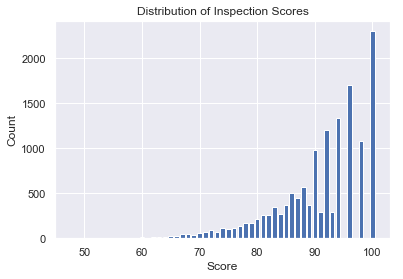

In [37]:
score_counts = ins['score'].value_counts()
plt.bar(score_counts.keys(), score_counts)
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Distribution of Inspection Scores");

The distribution is unimodal with a peak at 100. 
It is skewed left (as expected with a variable bounded on the right). 
The distribution has a long left tail with some restaurants receiving scores that are in the 50s, 60s, and 70s. One unusal feature of the distribution is the bumpiness with even numbers having higher counts than odd. This may be because the violations result in penalties of 2, 4, 10, etc. points.

### VI. 2) Worst scores

Let's figure out which restaurants had the worst scores ever. Let's start by creating a new dataframe called `ins_named`. It will be exactly the same as `ins`, except that it will have the name and address of every business, as determined by the `bus` dataframe. If a `business_id` in `ins` does not exist in `bus`, the name and address will be given as NaN.

In [38]:
ins_named = ins.merge(bus[["business_id", "name", "address"]], how="left", left_on = "business_id", 
                      right_on = "business_id")
ins_named.head()

,business_id,score,date,type,new_date,year,name,address
0,19,94,20160513,routine,2016-05-13,2016,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
1,19,94,20171211,routine,2017-12-11,2017,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
2,24,98,20171101,routine,2017-11-01,2017,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
3,24,98,20161005,routine,2016-10-05,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
4,24,96,20160311,routine,2016-03-11,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"


---
# Part VII - Restaurant Ratings Over Time

Let's consider various scenarios involving restaurants with multiple ratings over time.

### VII. 1) Improvement
Let's see which restaurant has had the most extreme improvement in its rating. Let the "swing" of a restaurant be defined as the difference between its highest and lowest rating ever. 

**Note: We only consider restaurants with at least 3 ratings!** 

We assign `max_swing` to the name of restaurant that has the maximum swing.

In [39]:
def swing(s):
    if len(s) < 3:
        return 0
    return max(s) - min(s)

swing_series = ins_named['score'].groupby(ins_named['business_id']).agg(swing).rename('swing')

bus_swing = pd.concat([bus.set_index('business_id'), swing_series], axis=1).sort_values("swing", ascending=False)

bus_swing.head()

,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5,swing
business_id,,,,,,,,,,
2044,JOANIE'S DINER INC.,1329 COLUMBUS AVE,San Francisco,CA,94133,37.806546,-122.419277,+14158232670,94133,39.0
77532,ANDI'S MARKET,820 CORTLAND AVE,San Francisco,CA,94110,NaN,NaN,NaN,94110,38.0
70983,M.Y. CHINA,845 MARKET ST STE. 400,San Francisco,CA,94103,NaN,NaN,NaN,94103,37.0
81460,"LE SOLEIL INTERNATIONAL HOLDINGS, INC",133 CLEMENT ST.,San Francisco,CA,94118,NaN,NaN,+14156684848,94118,37.0
83476,KIO RAMEN,3528 BALBOA ST,San Francisco,CA,94121,NaN,NaN,+14155395056,94121,36.0


In [40]:
max_swing = bus_swing.iloc[0]['name']
max_swing

"JOANIE'S DINER INC."

### VII. 2) Number of inspections for each restaurant

To get a sense of the number of times each restaurant has been inspected, we create a multi-indexed dataframe called `inspections_by_id_and_year` where each row corresponds to data about a given business in a single year, and there is a single data column named `count` that represents the number of inspections for that business in that year. The first index in the MultiIndex will be on `business_id`, and the second will be on `year`.

In [41]:
inspections_by_id_and_year = ins.groupby([ins['business_id'], ins['year']]).size().sort_values(
    ascending=False).rename("count").to_frame()

inspections_by_id_and_year.head()

,,count
business_id,year,
573,2017,4
1261,2015,4
2749,2016,3
5913,2015,3
86336,2016,3


We can see that some businesses are inspected many times in a single year. Let's get a sense of the distribution of the counts of the number of inspections by calling `value_counts`. There are quite a lot of businesses with 2 inspections in the same year, so it seems like it might be interesting to see what we can learn from such businesses.

In [42]:
inspections_by_id_and_year['count'].value_counts()

1    9531
2    2175
3     111
4       2
Name: count, dtype: int64

### VII. 3) Relationship between the first and second score

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve? For simplicity, let's focus on only 2016 for this problem.

First, we make a dataframe called `scores_pairs_by_business` indexed by `business_id` (containing only businesses with exactly 2 inspections in 2016).  This dataframe contains the field `score_pair` consisting of the score pairs ordered chronologically  `[first_score, second_score]`. 

We plot these scores. That is, we make a scatter plot to display these pairs of scores. We include on the plot a reference line with slope 1. 

In [43]:
ins2016 = ins[ins['year'] == 2016]

scores_pairs_by_business = (ins2016.sort_values('date')
                            .loc[:, ['business_id', 'score']]
                            .groupby('business_id')
                            .filter(lambda group: len(group)==2)
                            .groupby('business_id')
                            .agg(list)
                            .rename(columns={'score':'score_pair'}))

scores_pairs_by_business.head()

,score_pair
business_id,
24,"[96, 98]"
45,"[78, 84]"
66,"[98, 100]"
67,"[87, 94]"
76,"[100, 98]"


Now, we create your scatter plot in the cell below.

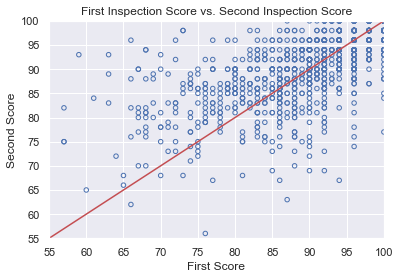

In [44]:
first_score, second_score = zip(*scores_pairs_by_business['score_pair'])
plt.scatter(first_score,second_score,s=20,facecolors='none',edgecolors='b')
plt.plot([55,100],[55,100],'r-')
plt.xlabel('First Score')
plt.ylabel('Second Score')
plt.axis([55,100,55,100])
plt.title("First Inspection Score vs. Second Inspection Score");

### VII. 4) Difference in scores

Another way to compare the scores from the two inspections is to examine the difference in scores. We subtract the first score from the second in `scores_pairs_by_business`. We make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

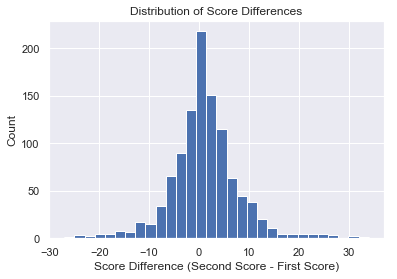

In [45]:
diffs = np.array(second_score) - np.array(first_score)
plt.hist(diffs, bins=30)
plt.title("Distribution of Score Differences")
plt.xlabel("Score Difference (Second Score - First Score)")
plt.ylabel("Count");

If the restaurants tend to improve from the first to the second inspection, we would expect to see the points in the scatter plot fall above the line of slope 1. 

We would also expect to see the histogram of the difference in scores to be shifted toward positive values. Interestingly, we don't see this. The second inspection often is worse than first. 

The histogram of differences shows a unimodal distribution centered at 0, hinting that the average restaurant does not see a change in score between their first and second inspection.

This distribution has long tails with some scores being as low as -20 and others as high as 20-30.

---
# Summary of the Inspections Data

What we have learned about the inspections data? What might be some next steps in our investigation? 

* We found that the records are at the inspection level and that we have inspections for multiple years.   
* We also found that many restaurants have more than one inspection a year. 
* By joining the business and inspection data, we identified the name of the restaurant with the worst rating and optionally the names of the restaurants with the best rating.
* We identified the restaurant that had the largest swing in rating over time.
* We also examined the relationship between the scores when a restaurant has multiple inspections in a year. Our findings were a bit counterintuitive and may warrant further investigation. 